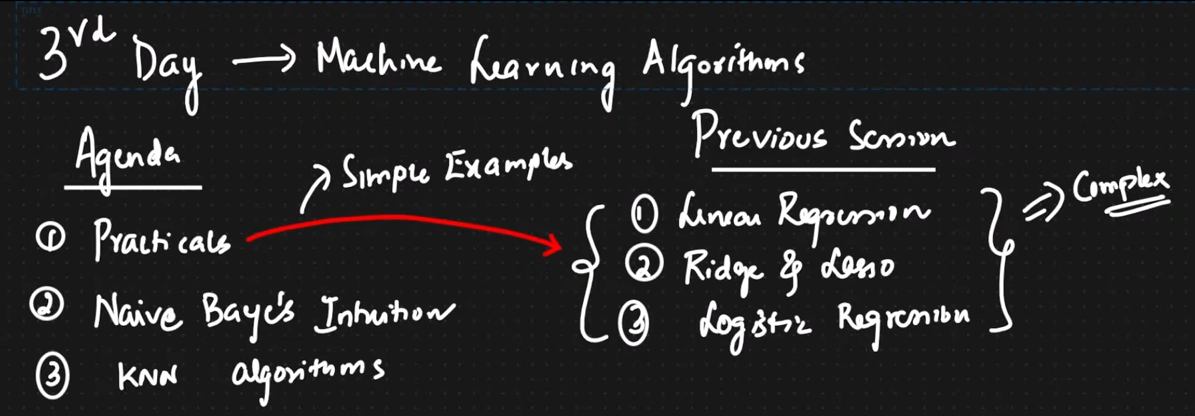

# Linear regression, Ridge and Lasso

In [2]:
from sklearn.datasets import load_boston
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dataset = pd.DataFrame(df.data, columns=df.feature_names)
dataset


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
dataset['price']=df.target
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
# dataset split
X = dataset.iloc[:,:-1]  # independent features
y = dataset.iloc[:,-1]  # dependent feature
print(X.shape, y.shape)

(506, 13) (506,)


In [13]:
## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



In [15]:
lr = LinearRegression()
mse =  cross_val_score(lr,X,y,scoring='neg_mean_squared_error', cv=5)  # usually you first split the data in training and test, and then use the training in the crossvalidation
mse_mean = np.mean(mse)
print('mse values:', mse)
print('mse mean:', mse_mean)


mse values: [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
mse mean: -37.13180746769923


In [ ]:
lr.predict()  # to make predictions

## Ridge regression

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [23]:
lr_ridge = Ridge()
params = {"alpha":[1e-15, 1e-10, 1e-5, 1e-2, 1, 5 ,10, 20]}

In [24]:
ridge_gs = GridSearchCV(lr_ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_gs.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [27]:
print(ridge_gs.best_params_)   # best cross validation parameters of alpha
print(ridge_gs.best_score_)    # best score for the best alpha

{'alpha': 20}
-32.38025025182519


## Lasso Regression

In [28]:
from sklearn.linear_model import Lasso

In [29]:
lr_lasso = Lasso()
params = {"alpha":[1e-15, 1e-10, 1e-5, 1e-2, 1, 5 ,10, 20]}

In [30]:
lasso_gs = GridSearchCV(lr_lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_gs.fit(X,y)

C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  positive)
C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  positive)
C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  positive)
C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did no

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [31]:
print(lasso_gs.best_params_)   # best cross validation parameters of alpha
print(lasso_gs.best_score_)    # best score for the best alpha

{'alpha': 1}
-35.53158022069486


### using data splitting

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(354, 13) (152, 13) (354,) (152,)


In [35]:
# linear regression
lr = LinearRegression()
mse =  cross_val_score(lr,xtrain,ytrain,scoring='neg_mean_squared_error', cv=5)  # usually you first split the data in training and test, and then use the training in the crossvalidation
mse_mean = np.mean(mse)
print('mse values:', mse)
print('mse mean:', mse_mean)


mse values: [-24.85792467 -32.34889563 -29.41534458 -18.46226827 -24.80445401]
mse mean: -25.977777430926334


In [71]:
from sklearn.metrics import r2_score

lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)    # predict by using the xtest
r2_score_lr = r2_score(ypred,ytest)
print('linear regression r2_score:', r2_score_lr)

linear regression r2_score: 0.6693702691495631


In [37]:
# ridge regression
lr_ridge = Ridge()
params = {"alpha":[1e-15, 1e-10, 1e-5, 1e-2, 1, 5 ,10, 20]}
ridge_gs = GridSearchCV(lr_ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_gs.fit(xtrain,ytrain)
print(ridge_gs.best_params_)   # best cross validation parameters of alpha
print(ridge_gs.best_score_)    # best score for the best alpha


{'alpha': 1e-15}
-25.977777430926306


In [73]:
ypred_ridge = ridge_gs.predict(xtest)    # predict by using the xtest
r2_score_lr_ridge = r2_score(ypred_ridge,ytest)
print('linear regression ridge r2_score:', r2_score_lr_ridge)

linear regression ridge r2_score: 0.6693702691495623


In [38]:
# lasso regression
lr_lasso = Lasso()
params = {"alpha":[1e-15, 1e-10, 1e-5, 1e-2, 1, 5 ,10, 20]}
lasso_gs = GridSearchCV(lr_lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_gs.fit(xtrain,ytrain)
print(lasso_gs.best_params_)   # best cross validation parameters of alpha
print(lasso_gs.best_score_)    # best score for the best alpha

{'alpha': 1e-15}
-25.977777430926295


C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3073.013934839376, tolerance: 2.4052331519434627
  positive)
C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2862.5432524937014, tolerance: 2.620286028268551
  positive)
C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2886.1723587184906, tolerance: 2.252183434628976
  positive)
C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did n

In [75]:
ypred_lasso = lasso_gs.predict(xtest)    # predict by using the xtest
r2_score_lr_lasso = r2_score(ypred_lasso,ytest)
print('linear regression lasso r2_score:', r2_score_lr_lasso)

linear regression lasso r2_score: 0.6693702691495614


# LOGISTIC REGRESSION  - FOR CLASSIFICATION

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [78]:
df = load_breast_cancer()
X = pd.DataFrame(df['data'], columns = df['feature_names'])
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [80]:
y = pd.DataFrame(df['target'],columns=['target'])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [81]:
y.value_counts()   # dataset looks balances

target
1         357
0         212
dtype: int64

In [82]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(398, 30) (171, 30) (398, 1) (171, 1)


In [84]:
params = {"C":[1,5,10], "max_iter":[100,150]}
params

{'C': [1, 5, 10], 'max_iter': [100, 150]}

In [85]:
log_reg = LogisticRegression()
log_reg_gs = GridSearchCV(log_reg, param_grid = params, scoring = "f1",cv=5)
log_reg_gs.fit(xtrain,ytrain)


C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'max_iter': [100, 150]},
             scoring='f1')

In [86]:
log_reg_gs.best_params_

{'C': 5, 'max_iter': 100}

In [88]:
log_reg_gs.best_score_

0.9640321430201272

In [100]:
ypred = log_reg_gs.predict(xtest)   # make prediction on test data

In [106]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [104]:
confusion_matrix(ypred,ytest)

array([[ 59,   1],
       [  4, 107]], dtype=int64)

In [107]:
accuracy_score(ypred,ytest)

0.9707602339181286

In [109]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        60
           1       0.99      0.96      0.98       111

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

